# GOV World HIV DATA

In [119]:
from __future__ import print_function, division
# if needed: pip install requests or conda install requests
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from collections import defaultdict
requests.__path__

['/Users/kelvin/anaconda3/lib/python3.7/site-packages/requests']

## Reading Datasets

In [2]:
hiv_death_rates = pd.read_csv("hiv-death-rates-by-age.csv")
print("hiv_death_rates:\n", hiv_death_rates.shape)
number_people_hiv = pd.read_csv("number-of-people-living-with-hiv.csv")
print("number_people_hiv:\n", number_people_hiv.shape)
#new_cases_hiv = pd.read_csv("new-cases-of-hiv-infection.csv")
#print("new_cases_hiv:\n", new_cases_hiv.shape)
share_population = pd.read_csv("share-of-population-infected-with-hiv-ihme.csv")
print("share_population:\n", share_population.shape)
death_newcases = pd.read_csv("deaths-and-new-cases-of-hiv.csv")
print("death_newcases:\n", death_newcases.shape)
share_women = pd.read_csv("share-of-women-among-the-population-living-with-hiv.csv")
print("share_women:\n", share_women.shape)
children_orphaned = pd.read_csv("number-of-children-orphaned-from-aids.csv")
print("children_orphaned:\n", children_orphaned.shape)
antiretroviral_coverage = pd.read_csv("antiretroviral-therapy-coverage-among-people-living-with-hiv.csv")
print("antiretroviral_corage:\n", antiretroviral_coverage.shape)

hiv_death_rates:
 (6468, 10)
number_people_hiv:
 (6468, 4)
share_population:
 (6468, 4)
death_newcases:
 (6468, 6)
share_women:
 (4586, 4)
children_orphaned:
 (2943, 4)
antiretroviral_corage:
 (3027, 4)


## Merging Datasets

In [3]:
#number_people_hiv column values
prevalence = number_people_hiv["Prevalence - HIV/AIDS - Sex: Both - Age: All Ages (Number) (people with HIV)"]
#Store prevalence in death_newcases dataset
death_newcases["Number of people living with HIV"] = prevalence
death_newcases.shape

(6468, 7)

In [4]:
#Prevalence in age 15-49 percent
prevalence_15_49 = share_population["Prevalence - HIV/AIDS - Sex: Both - Age: 15-49 years (Percent) (%)"] 
#Store prevalence_15_49 in death_newcases dataset
death_newcases["Prevalence age 15-49 percent"] = prevalence_15_49
death_newcases.shape

(6468, 8)

In [5]:
#Adding HIV rates by age columns into death_newcases
death_rates_age = hiv_death_rates.iloc[:, 3:-1]
hiv_data = pd.concat([death_newcases, death_rates_age], axis =1)
hiv_data.shape

(6468, 14)

## Data Preprocessing

In [6]:
#Rounding values in cols
hiv_data = hiv_data.round(3)
hiv_data.head()

Entity Code  Year  Deaths from HIV/AIDS (Number)  \
0  Afghanistan  AFG  1990                         32.098   
1  Afghanistan  AFG  1991                         37.524   
2  Afghanistan  AFG  1992                         50.671   
3  Afghanistan  AFG  1993                         58.433   
4  Afghanistan  AFG  1994                         65.531   

   New infections of HIV/AIDS (new cases of HIV infection)  \
0                                             78.305         
1                                             83.234         
2                                            104.710         
3                                            128.605         
4                                            136.849         

   Number of people living with HIV (x10) (tens of people living with HIV)  \
0                                             39.826                         
1                                             43.802                         
2                                             54.325                         
3                                             66.887                         
4                                             73.557                         

   Number of people living with HIV  Prevalence age 15-49 percent  \
0                           398.258                         0.007   
1                           438.020                         0.007   
2                           543.250                         0.007   
3                           668.870                         0.008   
4                           735.565                         0.008   

   Under-5s (per 100,000)  All ages (per 100,000)  \
0                   0.459                   0.321   
1                   0.513                   0.361   
2                   0.588                   0.413   
3                   0.651                   0.408   
4                   0.692                   0.436   

   70+ years old (per 100,000)  5-14 years old (per 100,000)  \
0                        0.523                         0.008   
1                        0.545                         0.010   
2                        0.592                         0.012   
3                        0.629                         0.014   
4                        0.668                         0.016   

   15-49 years old (per 100,000)  50-69 years old (per 100,000)  
0                          0.348                          0.646  
1                          0.388                          0.736  
2                          0.436                          0.869  
3                          0.401                          0.837  
4                          0.428                          0.868

In [7]:
#Dropping col
hiv_data.drop("Code",axis=1, inplace=True)

In [8]:
#Renaming columns
hiv_data.columns = ["Country", "Year", "Death", "New_infections", "Living with HIV (x10)", "Living with HIV", "HIV_Age 15_49", "HIV under 5(per 100,000)", "HIV all ages(per 100,000)", "HIV 70+(per 100,000)", "HIV age 5_14(per 100,000)", "HIV age 15_49(per 100,000)", "HIV age 50_69(per 100,000)"]
hiv_data.columns = hiv_data.columns.str.replace(" ", "_").str.lower()
hiv_data.columns

Index(['country', 'year', 'death', 'new_infections', 'living_with_hiv_(x10)',
       'living_with_hiv', 'hiv_age_15_49', 'hiv_under_5(per_100,000)',
       'hiv_all_ages(per_100,000)', 'hiv_70+(per_100,000)',
       'hiv_age_5_14(per_100,000)', 'hiv_age_15_49(per_100,000)',
       'hiv_age_50_69(per_100,000)'],
      dtype='object')

In [9]:
hiv_data.drop('living_with_hiv_(x10)', axis=1, inplace=True)

In [10]:
hiv_data.head()

country  year   death  new_infections  living_with_hiv  hiv_age_15_49  \
0  Afghanistan  1990  32.098          78.305          398.258          0.007   
1  Afghanistan  1991  37.524          83.234          438.020          0.007   
2  Afghanistan  1992  50.671         104.710          543.250          0.007   
3  Afghanistan  1993  58.433         128.605          668.870          0.008   
4  Afghanistan  1994  65.531         136.849          735.565          0.008   

   hiv_under_5(per_100,000)  hiv_all_ages(per_100,000)  hiv_70+(per_100,000)  \
0                     0.459                      0.321                 0.523   
1                     0.513                      0.361                 0.545   
2                     0.588                      0.413                 0.592   
3                     0.651                      0.408                 0.629   
4                     0.692                      0.436                 0.668   

   hiv_age_5_14(per_100,000)  hiv_age_15_49(per_100,000)  \
0                      0.008                       0.348   
1                      0.010                       0.388   
2                      0.012                       0.436   
3                      0.014                       0.401   
4                      0.016                       0.428   

   hiv_age_50_69(per_100,000)  
0                       0.646  
1                       0.736  
2                       0.869  
3                       0.837  
4                       0.868

In [11]:
hiv_data.shape

(6468, 12)

In [12]:
hiv_data.country.nunique()

231

### Dummies

In [13]:
#country dummies 
country_dummies = pd.get_dummies(hiv_data["country"])

In [14]:
clean_data = pd.concat([hiv_data.iloc[:,1:], country_dummies], axis=1)
clean_data.shape

(6468, 242)

In [15]:
clean_data.year.unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017])

In [16]:
clean_data.head()

year   death  new_infections  living_with_hiv  hiv_age_15_49  \
0  1990  32.098          78.305          398.258          0.007   
1  1991  37.524          83.234          438.020          0.007   
2  1992  50.671         104.710          543.250          0.007   
3  1993  58.433         128.605          668.870          0.008   
4  1994  65.531         136.849          735.565          0.008   

   hiv_under_5(per_100,000)  hiv_all_ages(per_100,000)  hiv_70+(per_100,000)  \
0                     0.459                      0.321                 0.523   
1                     0.513                      0.361                 0.545   
2                     0.588                      0.413                 0.592   
3                     0.651                      0.408                 0.629   
4                     0.692                      0.436                 0.668   

   hiv_age_5_14(per_100,000)  hiv_age_15_49(per_100,000)  ...  Vanuatu  \
0                      0.008                       0.348  ...        0   
1                      0.010                       0.388  ...        0   
2                      0.012                       0.436  ...        0   
3                      0.014                       0.401  ...        0   
4                      0.016                       0.428  ...        0   

   Venezuela  Vietnam  Wales  Western Europe  Western Sub-Saharan Africa  \
0          0        0      0               0                           0   
1          0        0      0               0                           0   
2          0        0      0               0                           0   
3          0        0      0               0                           0   
4          0        0      0               0                           0   

   World  Yemen  Zambia  Zimbabwe  
0      0      0       0         0  
1      0      0       0         0  
2      0      0       0         0  
3      0      0       0         0  
4      0      0       0         0  

[5 rows x 242 columns]

In [17]:
hiv_data.country.nunique()

231

## Reading GDP data

In [18]:
#gdp
gdp = pd.read_csv("gdp.csv")
gdp.columns
print(gdp.shape)
gdp = gdp[['Country', '1990', '1991', '1992', '1993',
'1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
'2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
'2012', '2013', '2014', '2015', '2016', '2017']]

(378, 47)


In [19]:
#gdp1
gdp1 = pd.read_csv("gdp1.csv")
gdp1["Country Name"].nunique()
print(gdp1.shape)
columns = ['Country Name','1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017']
gdp1 = gdp1[columns]

(264, 63)


In [20]:
hiv_countries = list(hiv_data.country.unique())
gdp_countries = list(gdp["Country"].unique())
gdp1_countries = list(gdp1["Country Name"].unique())
print("hiv_countries", len(hiv_countries))
print("gdp_countries", len(gdp_countries))
print("gdp1_countries", len(gdp1_countries))

hiv_countries 231
gdp_countries 189
gdp1_countries 264


In [21]:
mask = [e in gdp_countries for e in hiv_countries]
print(sum(mask))
mask1 = [e in gdp1_countries for e in hiv_countries]
print(sum(mask1))

163
173


In [22]:
list_countries = list(pd.Series(hiv_countries)[mask])
print(len(list_countries))
list_countries1 = list(pd.Series(hiv_countries)[mask1])
print(len(list_countries1))

163
173


In [23]:
print(gdp.shape)
print(gdp[gdp["Country"].isin(list_countries)].shape)
print(gdp1[gdp1["Country Name"].isin(list_countries1)].shape)

(378, 29)
(326, 29)
(173, 29)


In [24]:
years = ['1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017']

In [25]:
gdp1.shape

(264, 29)

In [26]:
adam_test = gdp1[gdp1["Country Name"].isin(list_countries1)]

In [27]:
adam_test.head()

Country Name          1990          1991          1992  \
1           Afghanistan           NaN           NaN           NaN   
2                Angola  1.122876e+10  1.060378e+10  8.307811e+09   
3               Albania  2.028554e+09  1.099559e+09  6.521750e+08   
4               Andorra  1.029048e+09  1.106929e+09  1.210014e+09   
6  United Arab Emirates  5.070144e+10  5.155217e+10  5.423917e+10   

           1993          1994          1995          1996          1997  \
1           NaN           NaN           NaN           NaN           NaN   
2  5.768720e+09  4.438321e+09  5.538749e+09  7.526447e+09  7.648377e+09   
3  1.185315e+09  1.880952e+09  2.392765e+09  3.199643e+09  2.258516e+09   
4  1.007026e+09  1.017549e+09  1.178739e+09  1.223945e+09  1.180597e+09   
6  5.562517e+10  5.930509e+10  6.574367e+10  7.357123e+10  7.883901e+10   

           1998  ...          2008          2009          2010          2011  \
1           NaN  ...  1.010922e+10  1.243909e+10  1.585657e+10  1.780428e+10   
2  6.506230e+09  ...  8.853861e+10  7.030716e+10  8.379950e+10  1.120000e+11   
3  2.545967e+09  ...  1.288135e+10  1.204421e+10  1.192695e+10  1.289087e+10   
4  1.211932e+09  ...  4.007353e+09  3.660531e+09  3.355695e+09  3.442063e+09   
6  7.567434e+10  ...  3.150000e+11  2.540000e+11  2.900000e+11  3.510000e+11   

           2012          2013          2014          2015          2016  \
1  2.000162e+10  2.056105e+10  2.048487e+10  1.990711e+10  1.936264e+10   
2  1.280000e+11  1.370000e+11  1.460000e+11  1.160000e+11  1.010000e+11   
3  1.231978e+10  1.277628e+10  1.322825e+10  1.138693e+10  1.186135e+10   
4  3.164615e+09  3.281585e+09  3.350736e+09  2.811489e+09  2.877312e+09   
6  3.750000e+11  3.900000e+11  4.030000e+11  3.580000e+11  3.570000e+11   

           2017  
1  2.019176e+10  
2  1.220000e+11  
3  1.302506e+10  
4  3.013387e+09  
6  3.830000e+11  

[5 rows x 29 columns]

In [28]:
list_of_dicts = []

# (Country, year, gdp)
for current_country in adam_test['Country Name'].unique():
    for current_year in years:
        temp_dict = {}
        
        temp_dict['country'] = current_country
        temp_dict['year'] = current_year
        temp_dict['gdp'] = adam_test[(adam_test['Country Name'] == current_country)][current_year].iloc[0]
        
        list_of_dicts.append(temp_dict)

In [29]:
adam_df = pd.DataFrame(list_of_dicts)

In [30]:
adam_df.columns

Index(['country', 'year', 'gdp'], dtype='object')

In [31]:
adam_df["gdp"].isnull().sum()

194

In [32]:
adam_df

country  year           gdp
0     Afghanistan  1990           NaN
1     Afghanistan  1991           NaN
2     Afghanistan  1992           NaN
3     Afghanistan  1993           NaN
4     Afghanistan  1994           NaN
...           ...   ...           ...
4839     Zimbabwe  2013  1.909102e+10
4840     Zimbabwe  2014  1.949552e+10
4841     Zimbabwe  2015  1.996312e+10
4842     Zimbabwe  2016  2.054868e+10
4843     Zimbabwe  2017  2.281301e+10

[4844 rows x 3 columns]

## Merging Datasets (GDP, HIV)

In [33]:
print("hiv shape", hiv_data.shape)
hiv_data.head()

hiv shape (6468, 12)


country  year   death  new_infections  living_with_hiv  hiv_age_15_49  \
0  Afghanistan  1990  32.098          78.305          398.258          0.007   
1  Afghanistan  1991  37.524          83.234          438.020          0.007   
2  Afghanistan  1992  50.671         104.710          543.250          0.007   
3  Afghanistan  1993  58.433         128.605          668.870          0.008   
4  Afghanistan  1994  65.531         136.849          735.565          0.008   

   hiv_under_5(per_100,000)  hiv_all_ages(per_100,000)  hiv_70+(per_100,000)  \
0                     0.459                      0.321                 0.523   
1                     0.513                      0.361                 0.545   
2                     0.588                      0.413                 0.592   
3                     0.651                      0.408                 0.629   
4                     0.692                      0.436                 0.668   

   hiv_age_5_14(per_100,000)  hiv_age_15_49(per_100,000)  \
0                      0.008                       0.348   
1                      0.010                       0.388   
2                      0.012                       0.436   
3                      0.014                       0.401   
4                      0.016                       0.428   

   hiv_age_50_69(per_100,000)  
0                       0.646  
1                       0.736  
2                       0.869  
3                       0.837  
4                       0.868

In [34]:
print("gdp shape", adam_df.shape)
adam_df.head()

gdp shape (4844, 3)


country  year  gdp
0  Afghanistan  1990  NaN
1  Afghanistan  1991  NaN
2  Afghanistan  1992  NaN
3  Afghanistan  1993  NaN
4  Afghanistan  1994  NaN

In [35]:
adam_df["year"] = adam_df["year"].astype(int)

In [36]:
merged_hiv_gdp = hiv_data.merge(adam_df, on=['country', 'year'], how='left')

In [120]:
merged_hiv_gdp.shape

(6468, 13)

## PREPARE FOR REGRESSION

In [127]:
merged = merged_hiv_gdp.copy()

In [128]:
merged.drop("gdp", axis=1, inplace=True)
merged.shape

(6468, 12)

In [129]:
#ADD NEW INFECTIONS
merged["next_infections"] = merged.groupby("country")["new_infections"].shift(-1)
#merged["next_death"] = merged_hiv_gdp.groupby("country")["death"].shift(-1)
#merged["next_living"] = merged_hiv_gdp.groupby("country")["living_with_hiv"].shift(-1)

In [130]:
#country dummies
country_dummies = pd.get_dummies(merged["country"])
print(merged.shape)
merged = pd.concat([merged, country_dummies], axis=1)
print(merged.shape)

(6468, 13)
(6468, 244)


In [131]:
#test set 2017
test_merged = merged[merged["year"] == 2017]
#train set not 2017
train_merged = merged[merged["year"] != 2017]
print(test_merged.shape)
print(train_merged.shape)

(231, 244)
(6237, 244)


In [132]:
#Set Label
train_label = train_merged["next_infections"]
#Drop next infections
train_merged.drop(["next_infections", "country"], axis=1, inplace=True)
train_merged.shape

(6237, 242)

In [133]:
#Drop next infections.
test_merged.drop(["next_infections", "country"], axis=1, inplace=True)
test_merged.shape

(231, 242)

In [49]:
train_label.shape

(6237,)

## SKLEARN REGRESSION

In [51]:
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
import xgboost as xgb
from xgboost import plot_importance
from matplotlib import pyplot
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [52]:
x_train, x_test, y_train, y_test = train_test_split(train_merged, train_label, test_size=0.20)

CV score:  0.9833164206348878
XGB Regressor: 99.83%


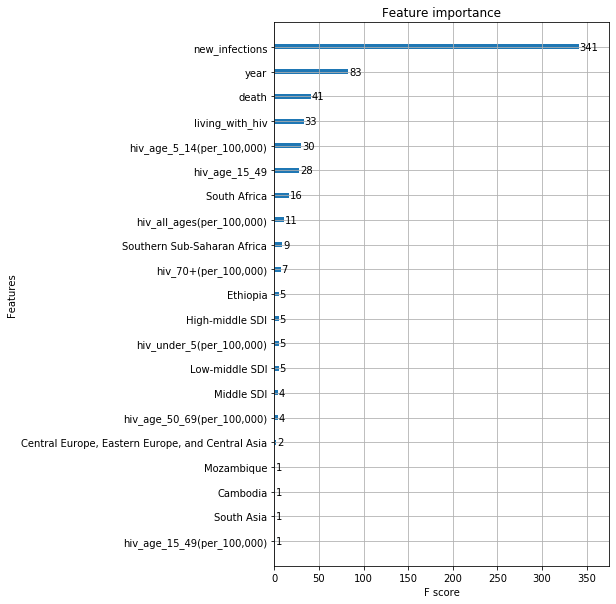

In [53]:
model = xgb.XGBRegressor(objective="reg:squarederror")
model.fit(x_train, y_train)
predict = model.predict(x_test)
score = model.score(x_test, y_test)
print("CV score: ", np.mean(cross_val_score(model, x_test, y_test, cv=10)))
print("XGB Regressor: %.2f%%" % (score * 100.0))
ax = plot_importance(model)
fig = ax.figure
fig.set_size_inches(6, 10)
pyplot.show()

In [55]:
predictions_2018_infections = model.predict(test_merged)

In [68]:
test_merged["next_infections"] = predictions_2018_infections
test_merged.shape

(231, 243)

In [72]:
pd.options.display.max_rows = 300

In [75]:
train_merged["next_infections"] = train_label
train_merged.shape

(6237, 243)

In [78]:
#Joined dataframes back, 2017 with 2018 predictions
merged_back = pd.concat([train_merged, test_merged], axis=0)
merged_back.shape

(6468, 243)

In [86]:
#getting countries back as first col
first_cols = merged_back.iloc[:, :11]
last_col = merged_back.iloc[:, -1:]
countries = merged_back.iloc[:, 11:-1].idxmax(axis=1)

In [89]:
final_data = pd.concat([first_cols, last_col, countries], axis=1).rename(columns={0: "country"})
final_data.shape

(6468, 13)

country
Afghanistan                                         AxesSubplot(0.125,0.125;0.775x0.755)
Albania                                             AxesSubplot(0.125,0.125;0.775x0.755)
Algeria                                             AxesSubplot(0.125,0.125;0.775x0.755)
American Samoa                                      AxesSubplot(0.125,0.125;0.775x0.755)
Andean Latin America                                AxesSubplot(0.125,0.125;0.775x0.755)
Andorra                                             AxesSubplot(0.125,0.125;0.775x0.755)
Angola                                              AxesSubplot(0.125,0.125;0.775x0.755)
Antigua and Barbuda                                 AxesSubplot(0.125,0.125;0.775x0.755)
Argentina                                           AxesSubplot(0.125,0.125;0.775x0.755)
Armenia                                             AxesSubplot(0.125,0.125;0.775x0.755)
Australasia                                         AxesSubplot(0.125,0.125;0.775x0.755)
Australia    

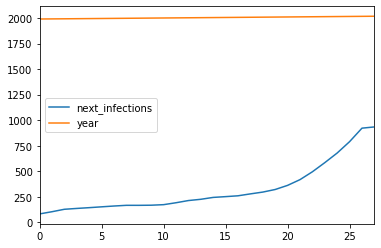

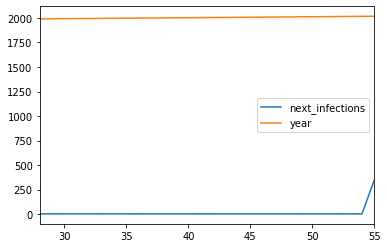

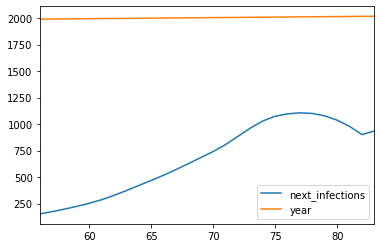

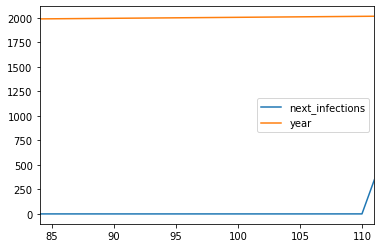

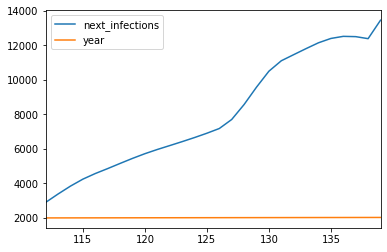

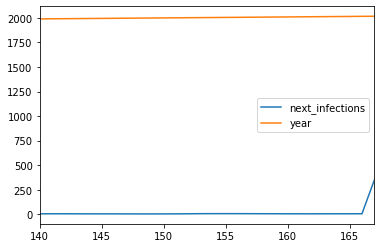

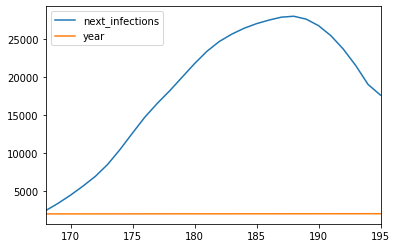

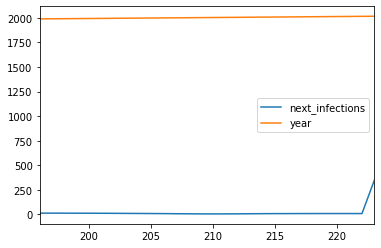

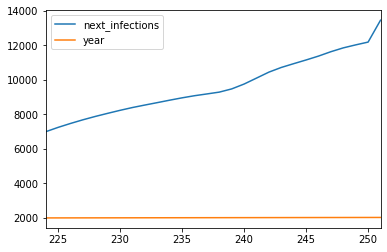

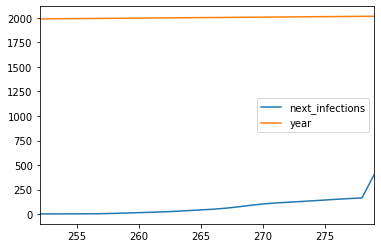

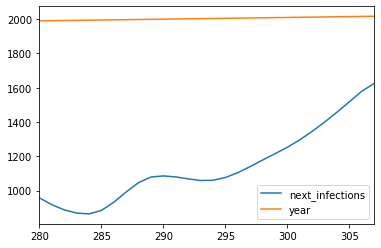

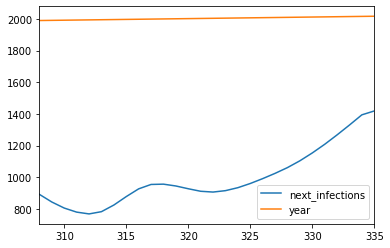

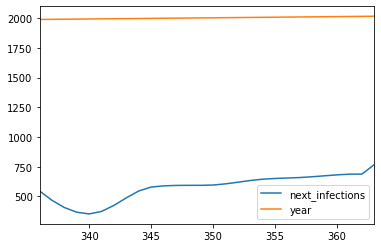

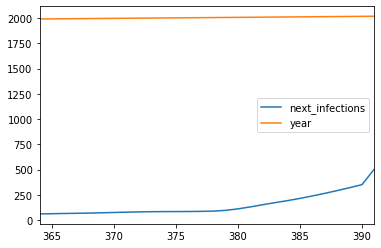

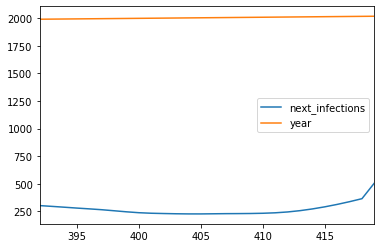

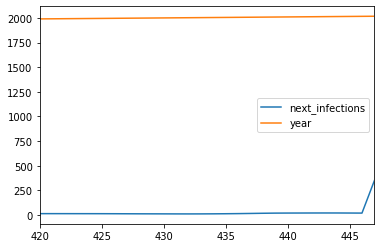

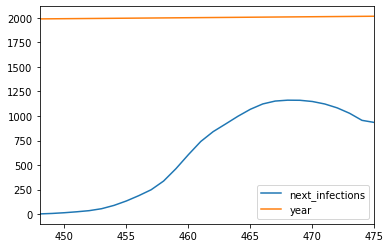

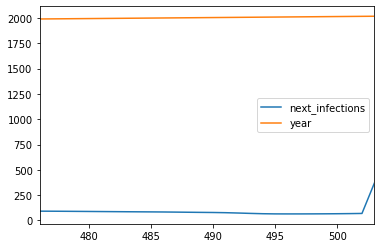

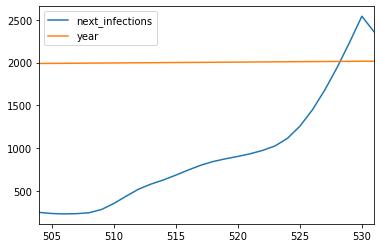

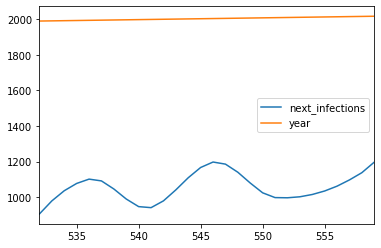

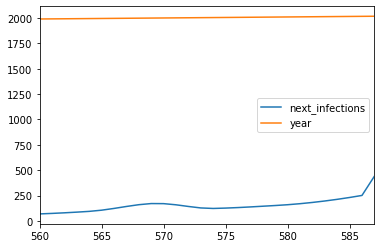

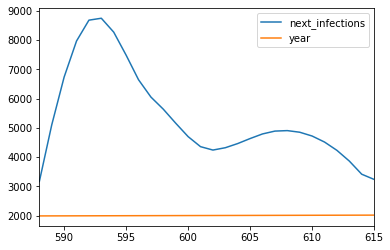

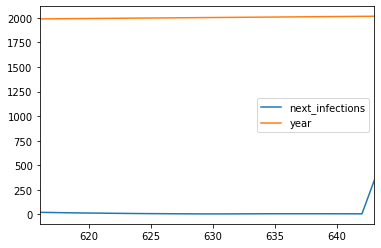

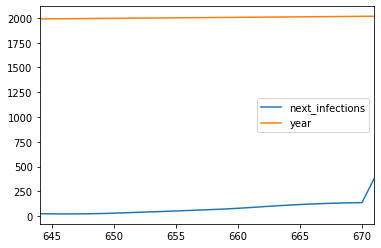

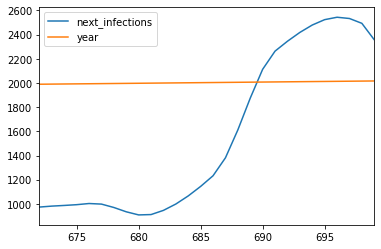

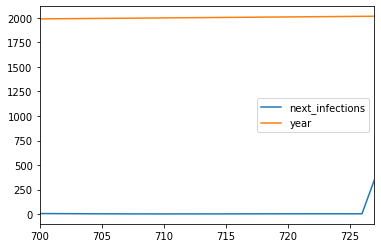

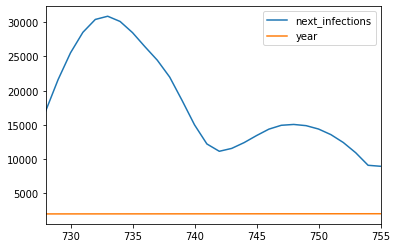

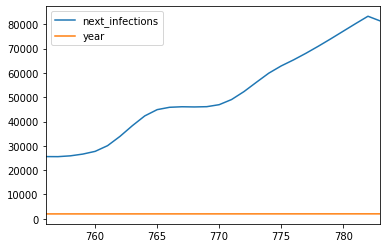

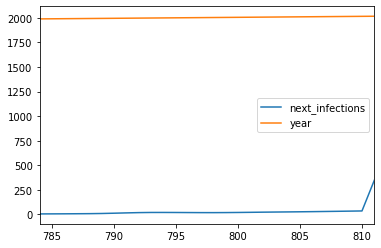

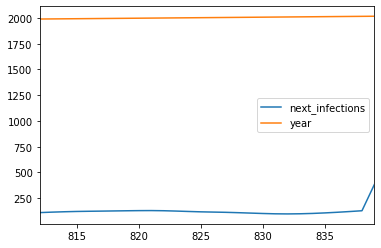

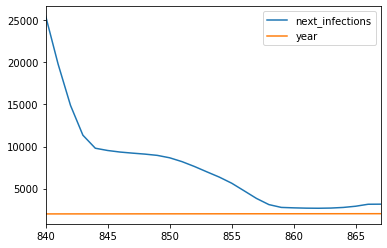

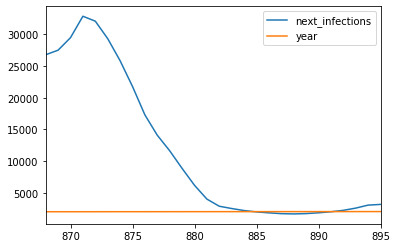

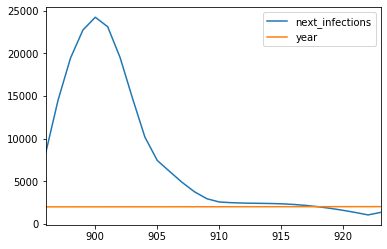

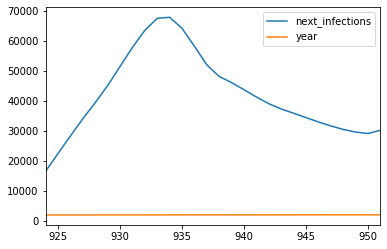

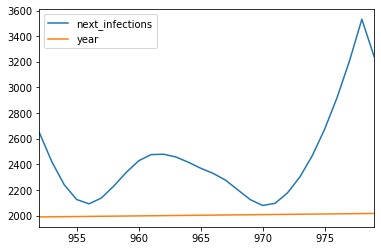

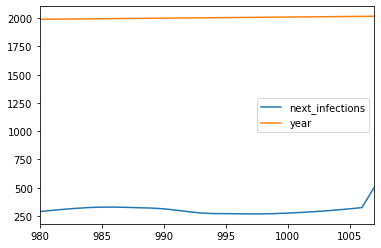

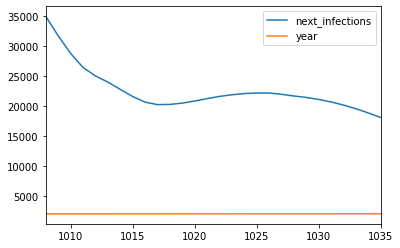

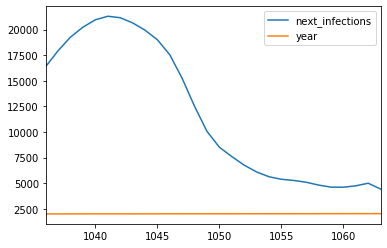

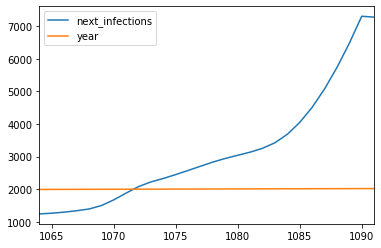

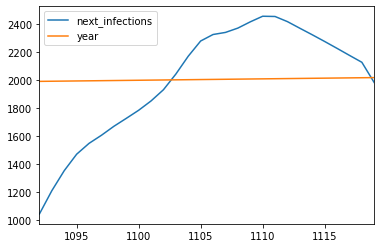

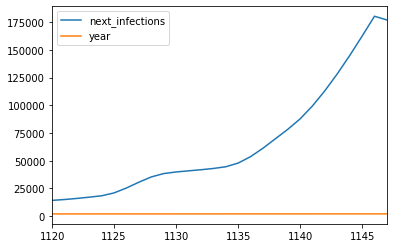

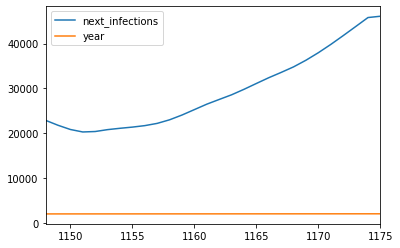

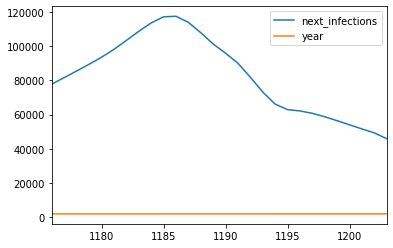

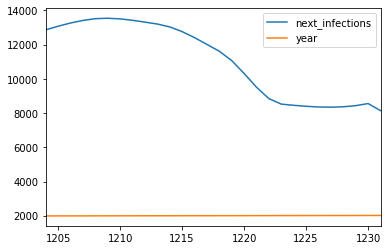

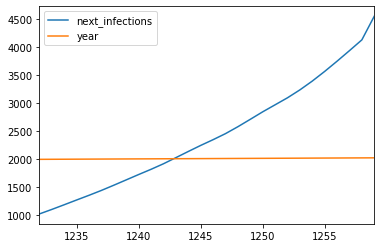

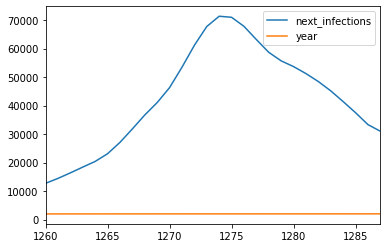

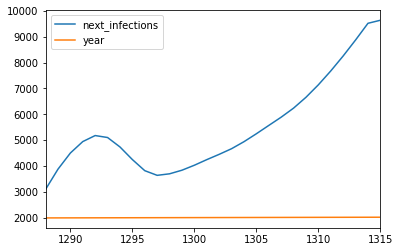

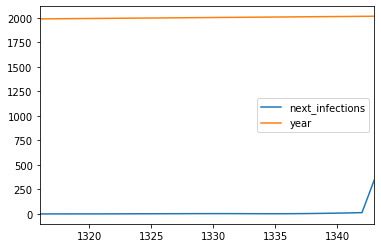

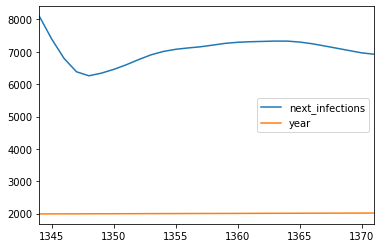

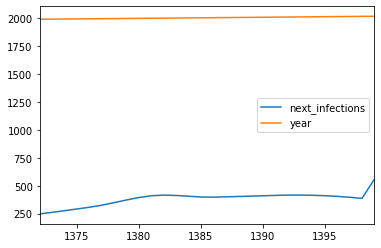

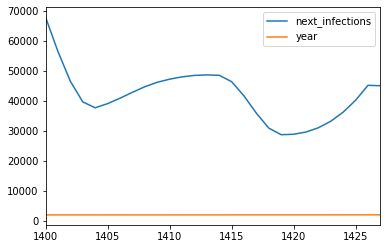

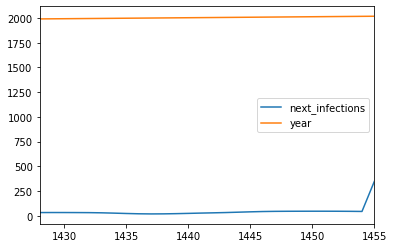

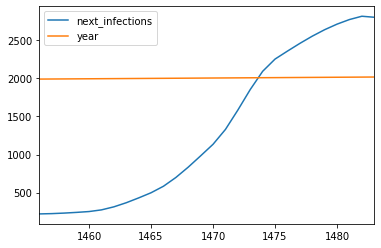

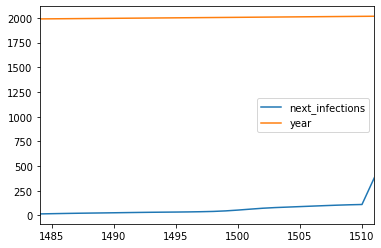

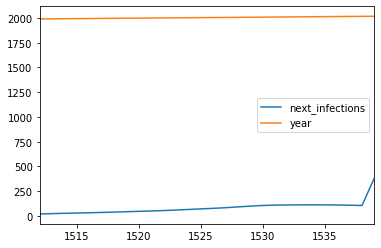

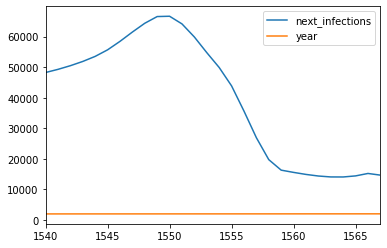

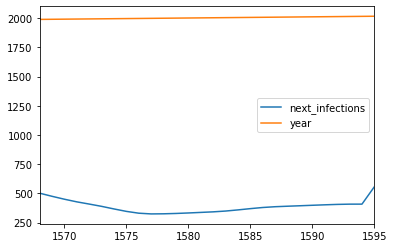

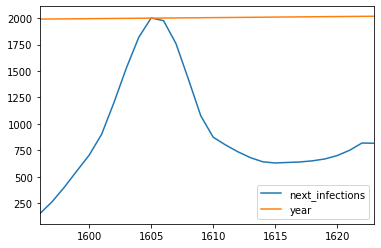

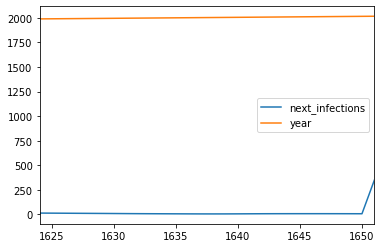

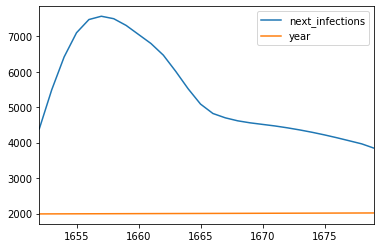

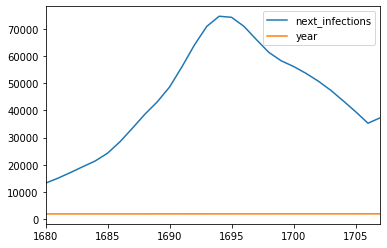

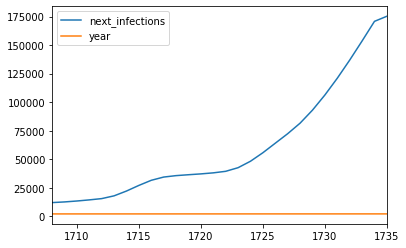

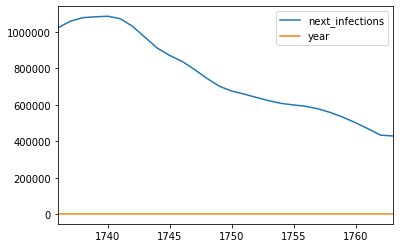

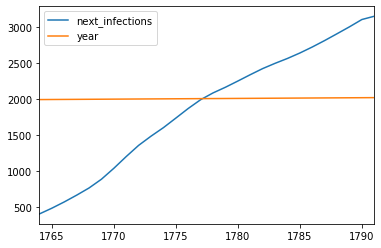

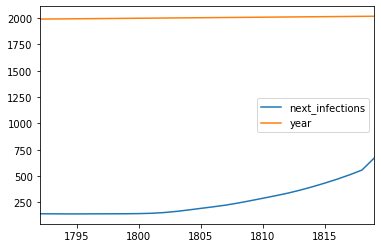

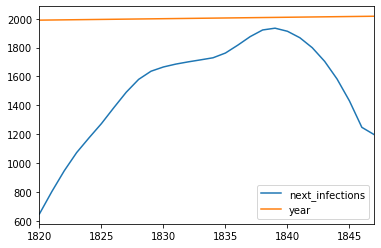

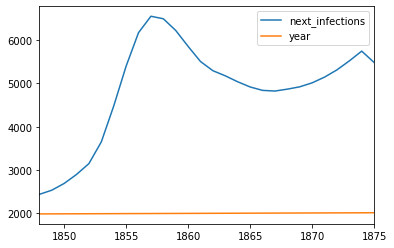

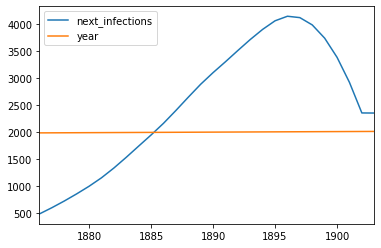

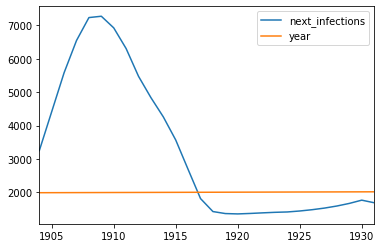

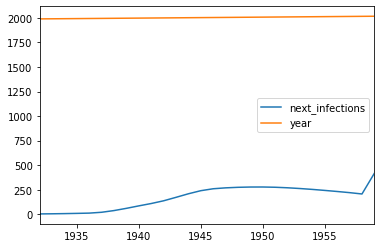

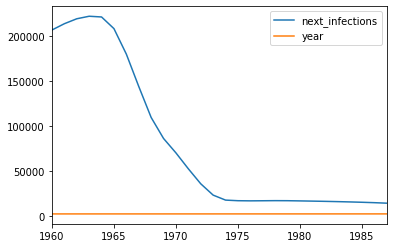

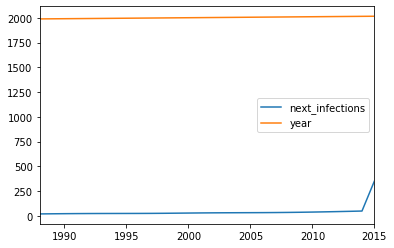

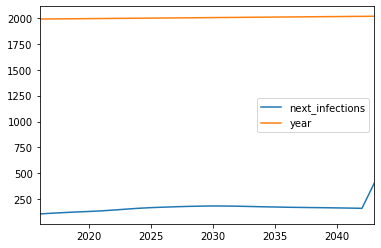

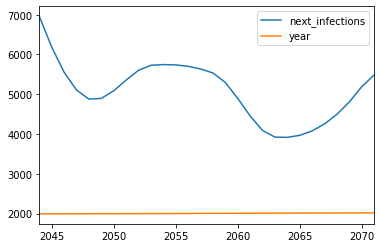

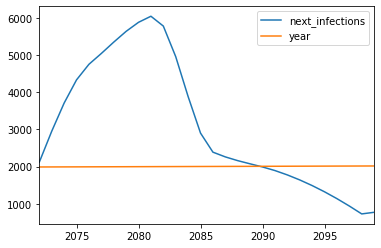

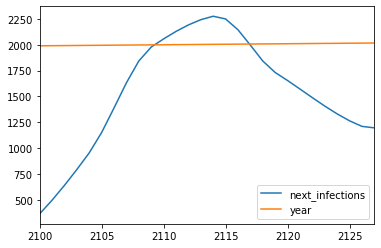

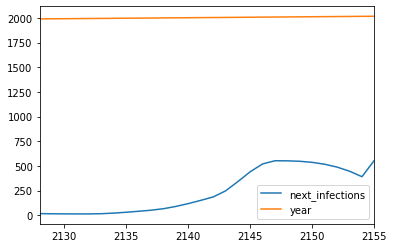

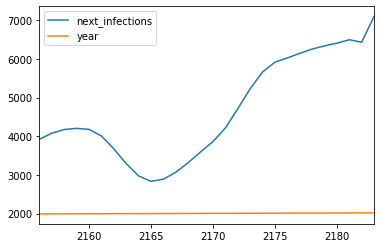

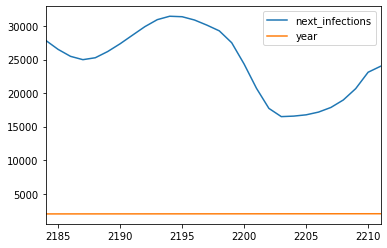

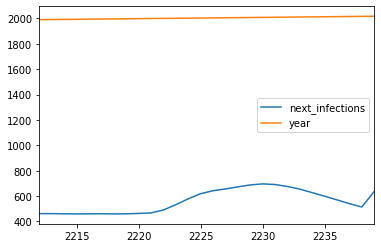

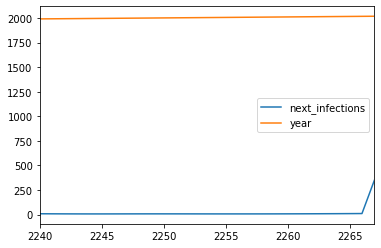

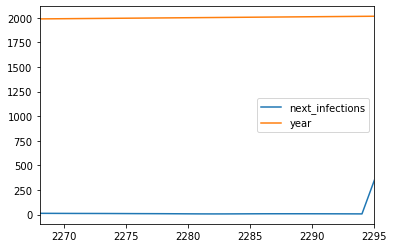

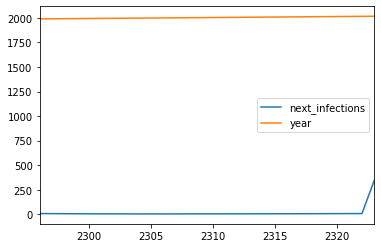

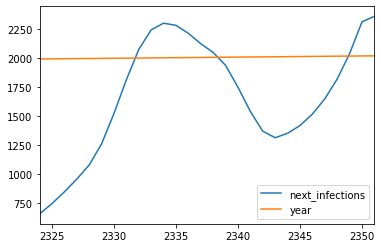

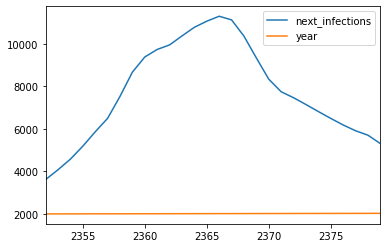

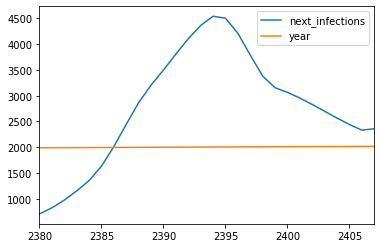

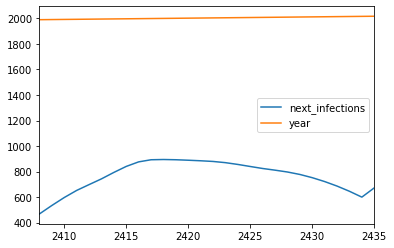

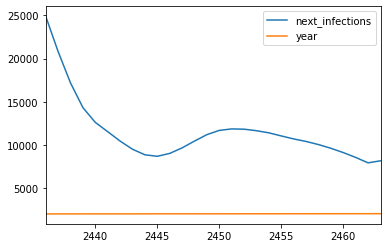

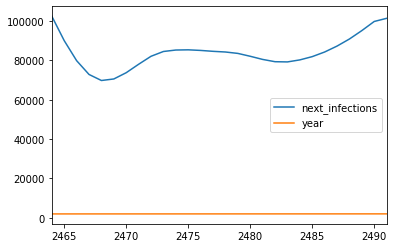

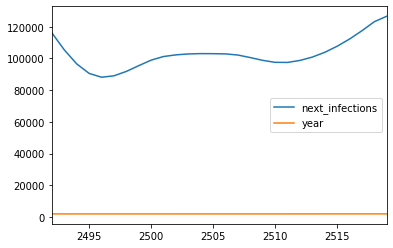

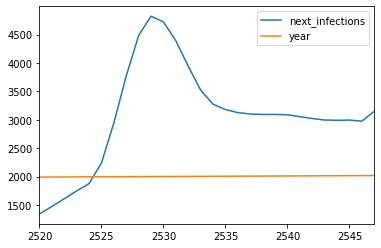

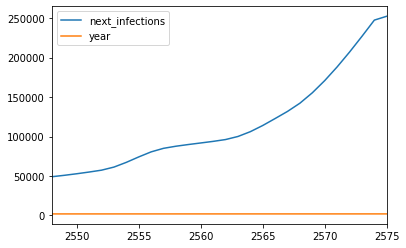

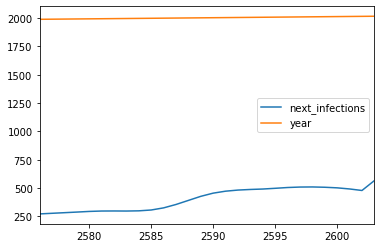

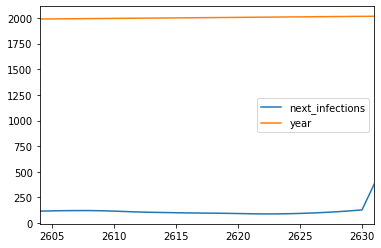

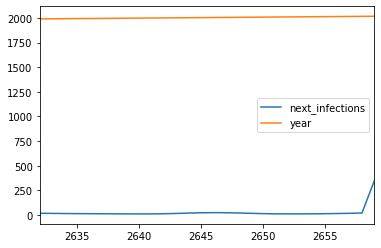

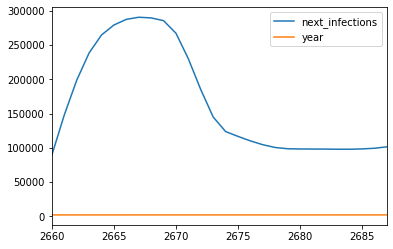

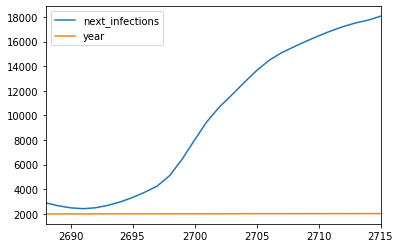

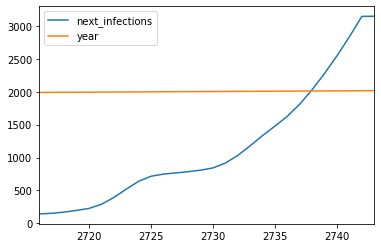

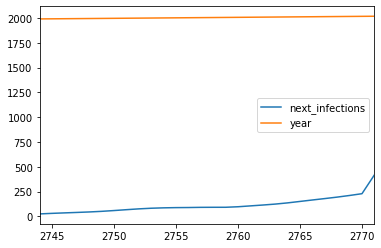

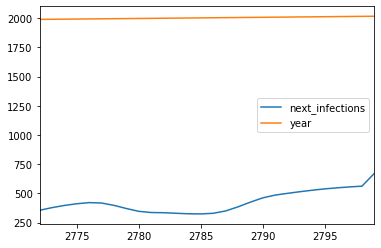

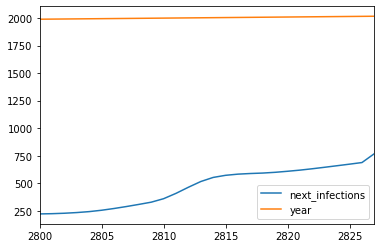

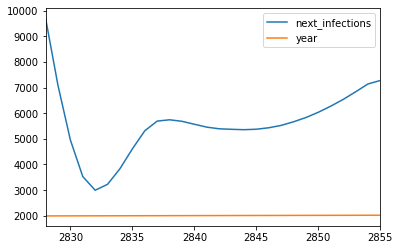

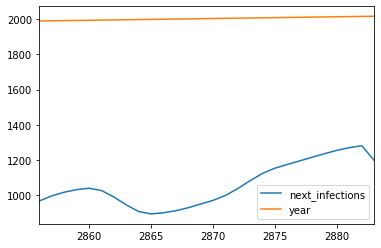

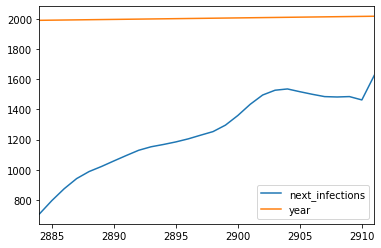

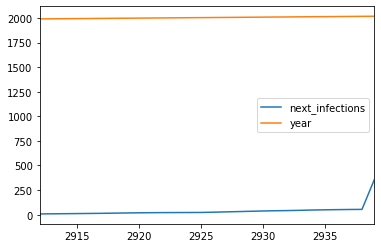

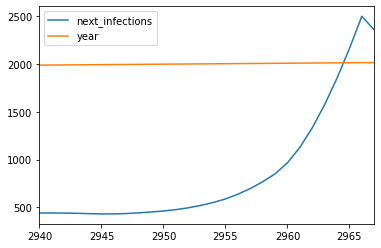

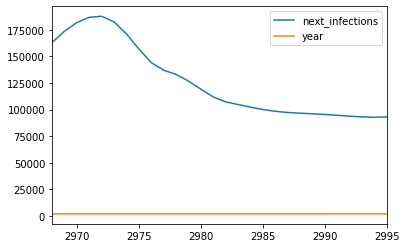

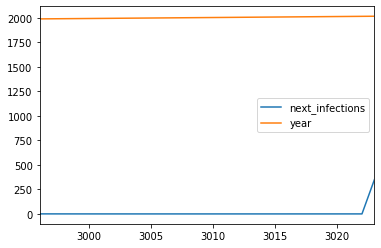

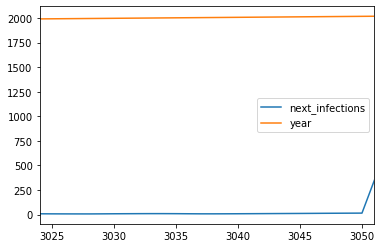

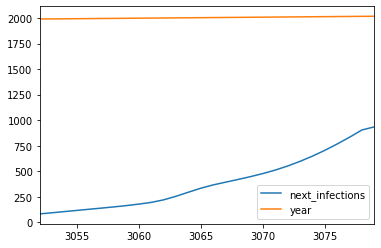

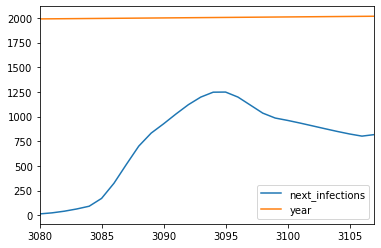

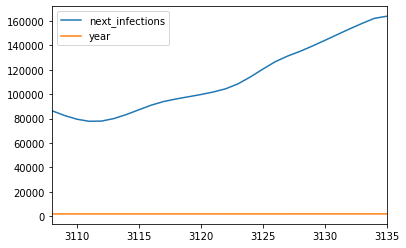

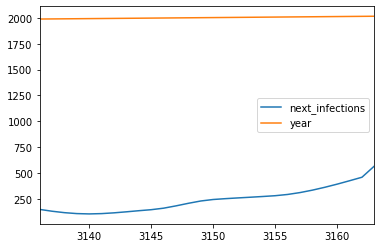

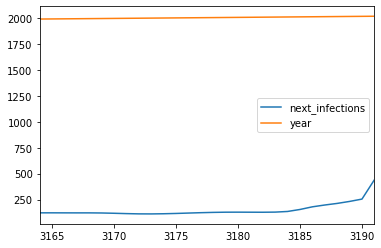

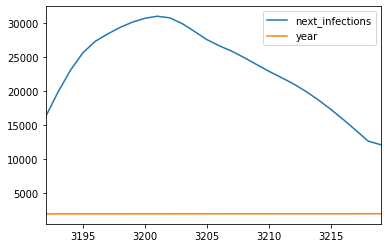

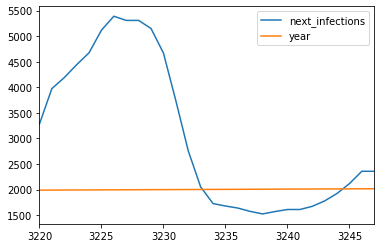

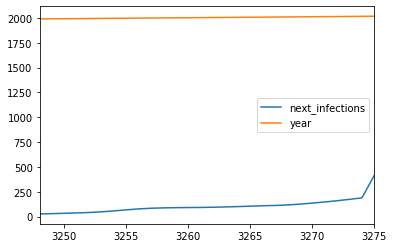

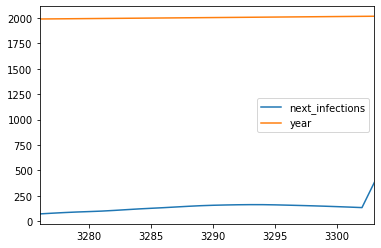

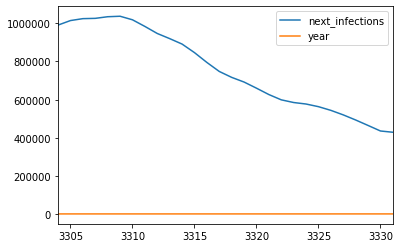

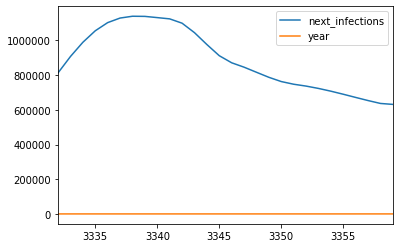

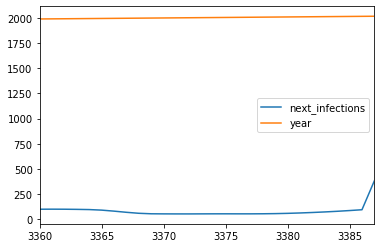

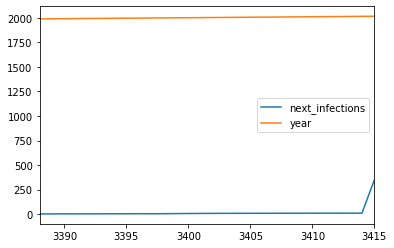

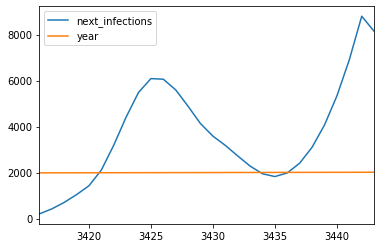

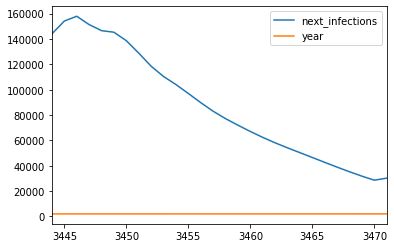

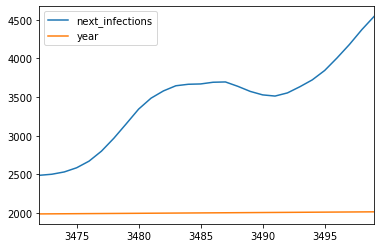

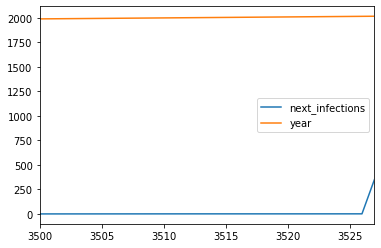

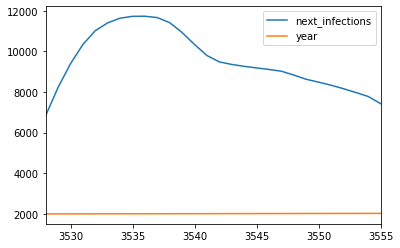

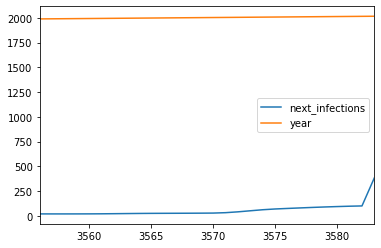

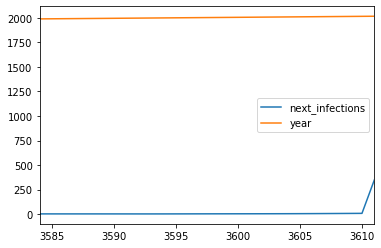

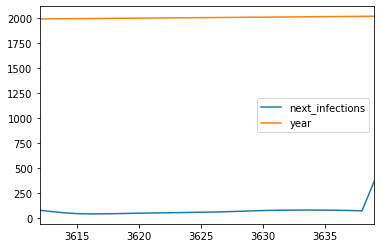

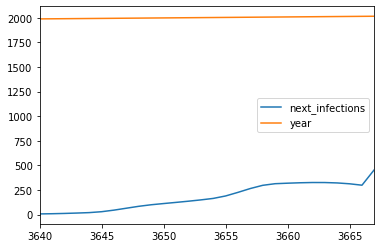

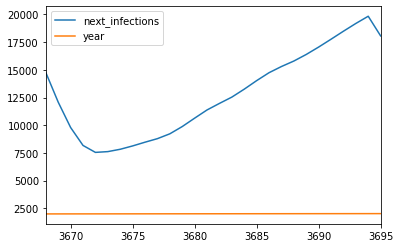

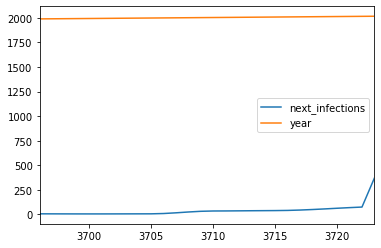

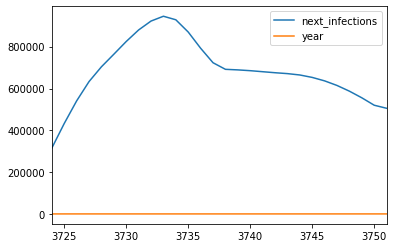

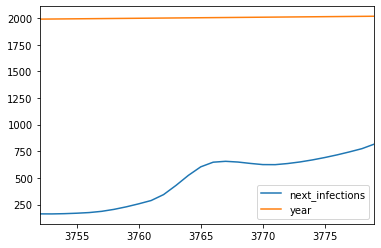

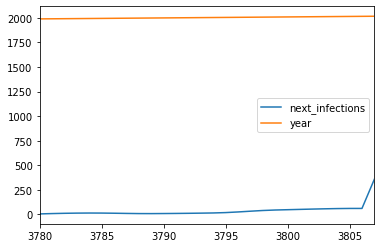

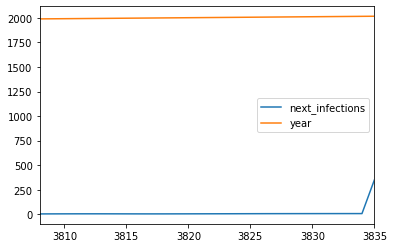

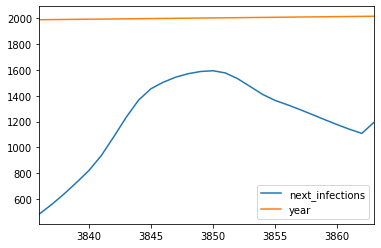

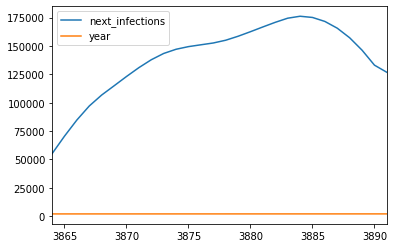

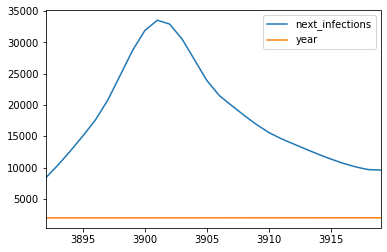

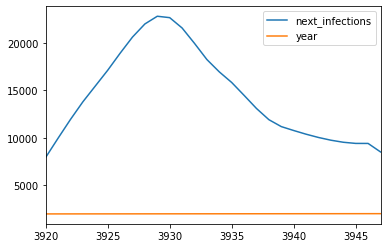

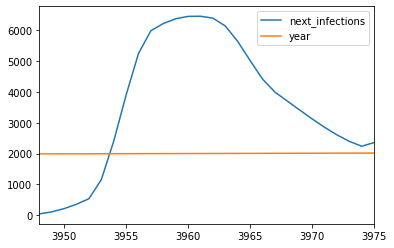

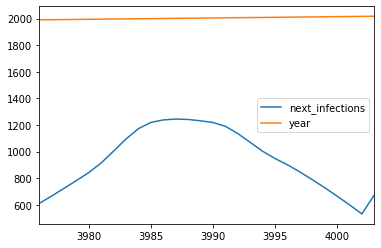

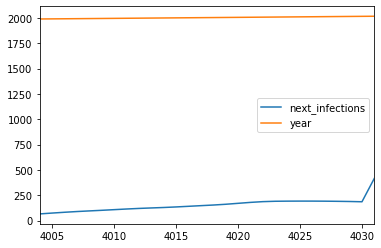

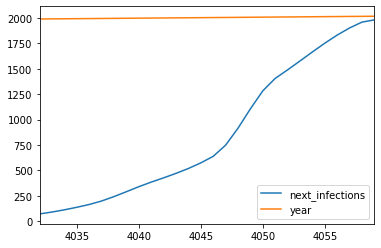

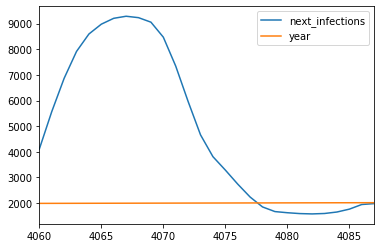

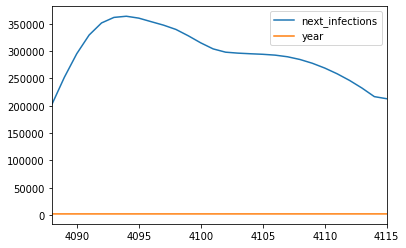

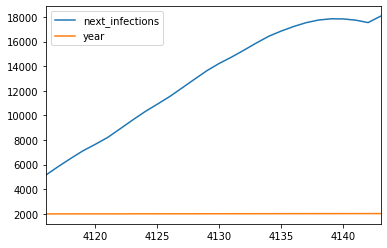

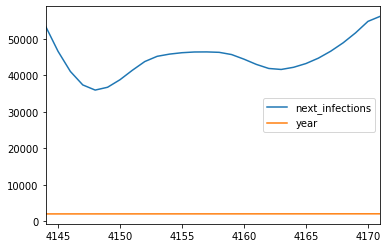

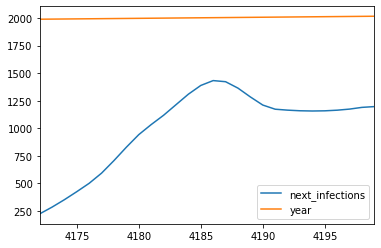

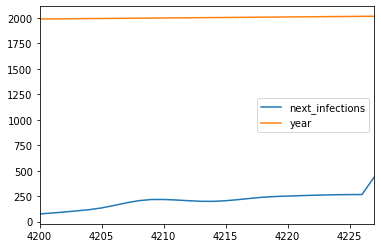

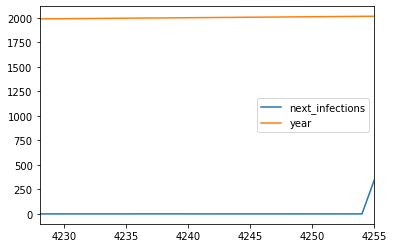

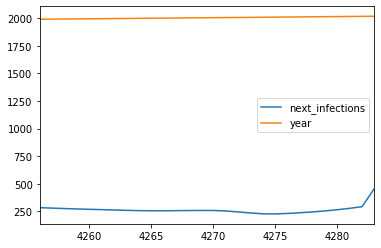

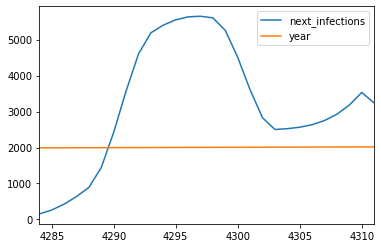

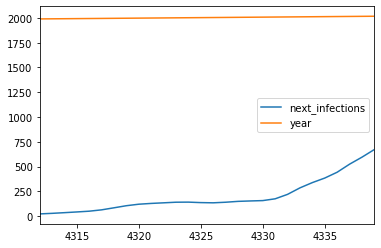

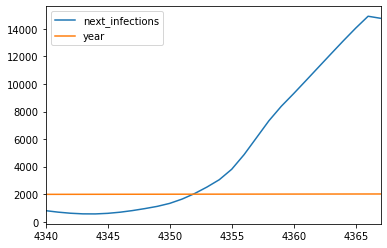

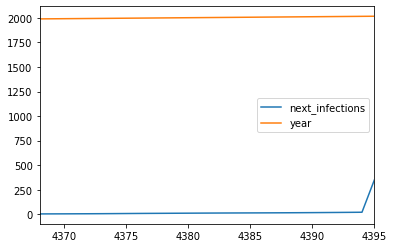

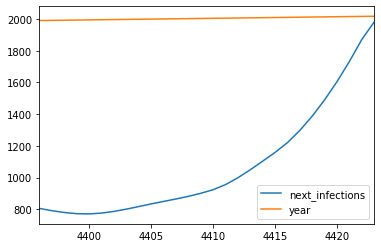

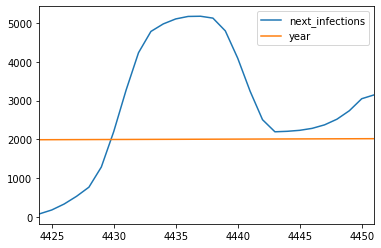

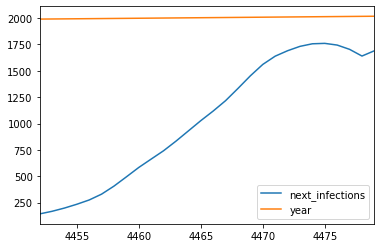

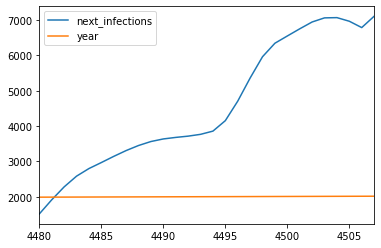

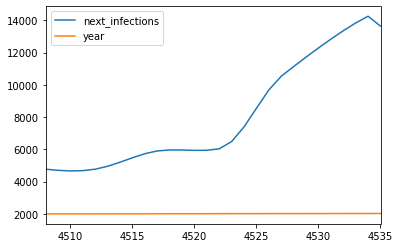

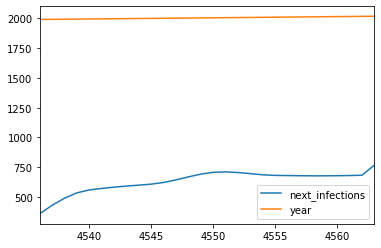

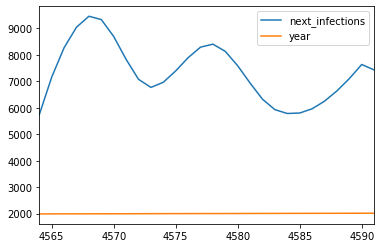

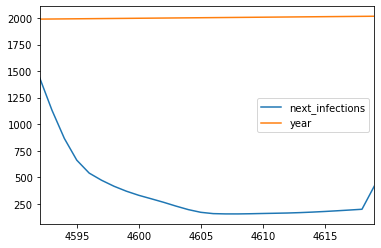

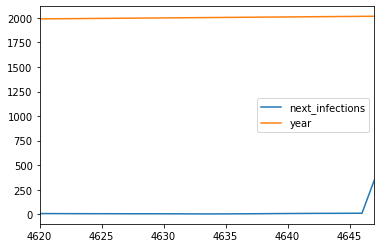

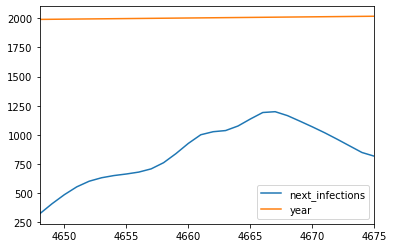

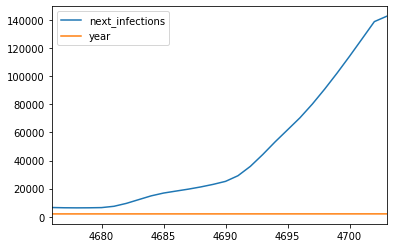

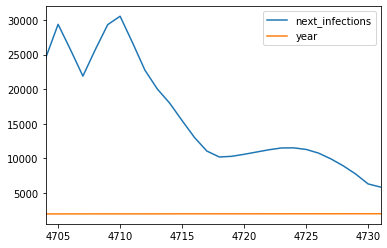

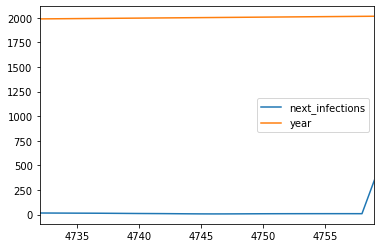

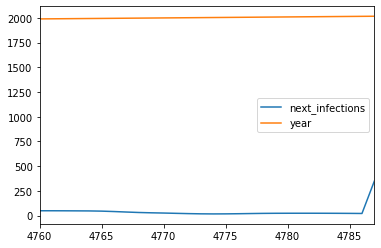

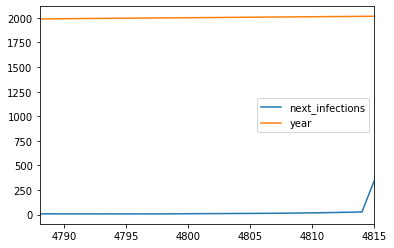

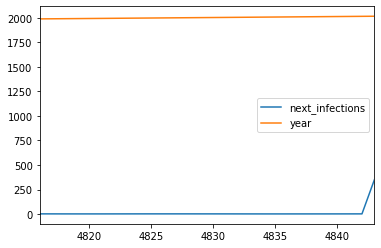

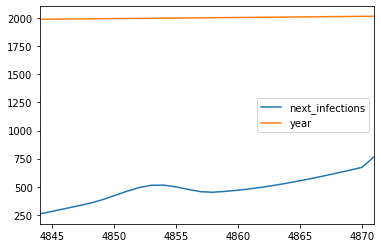

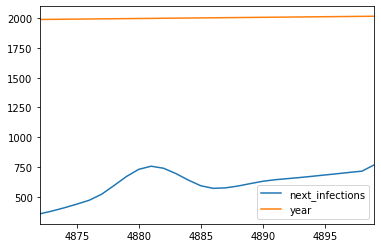

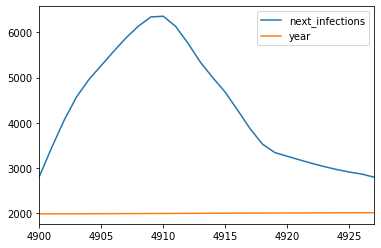

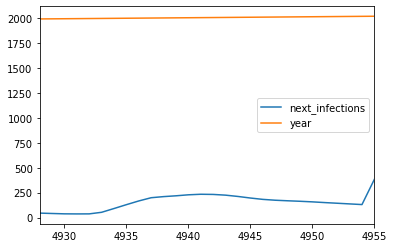

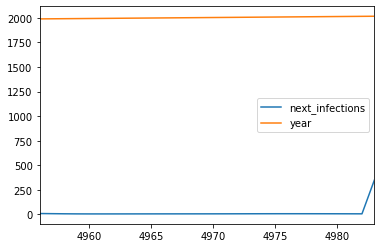

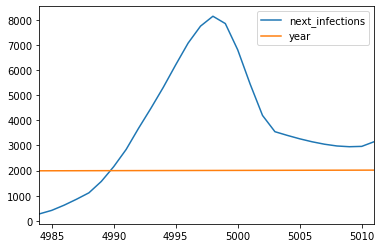

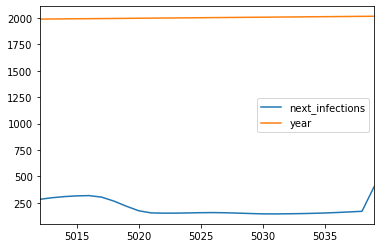

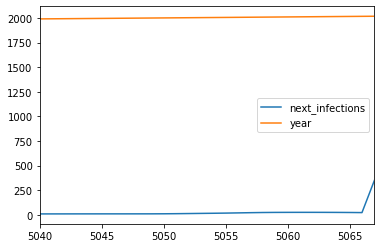

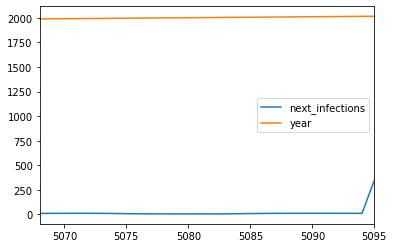

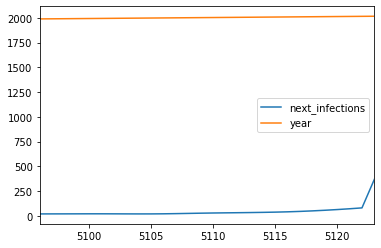

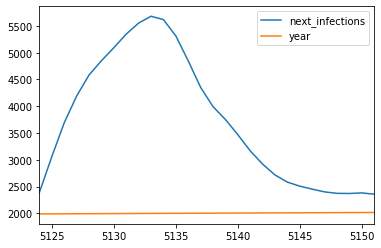

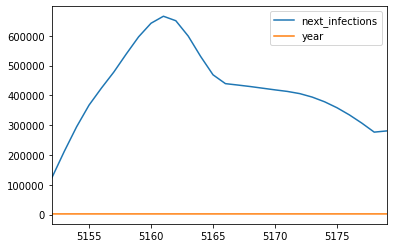

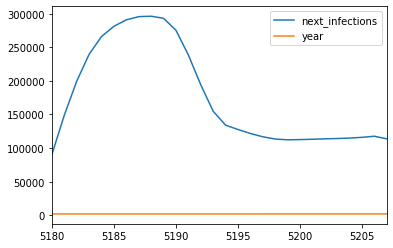

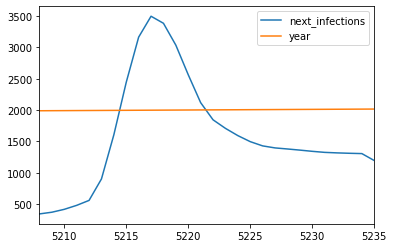

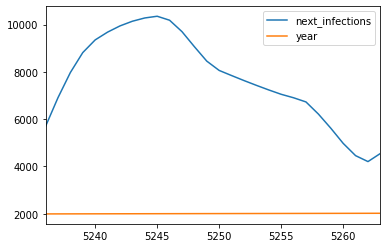

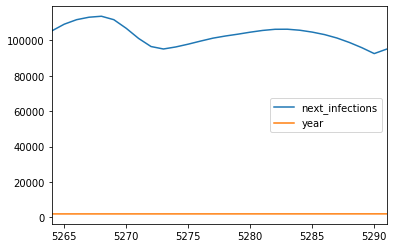

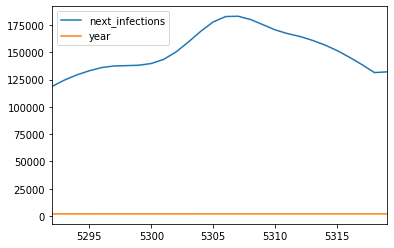

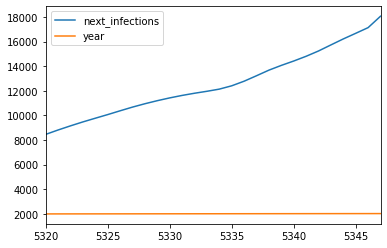

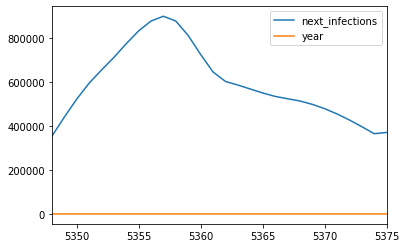

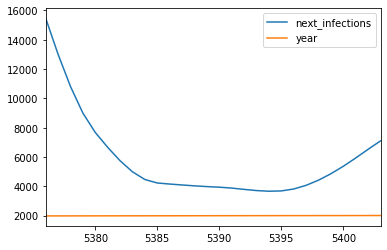

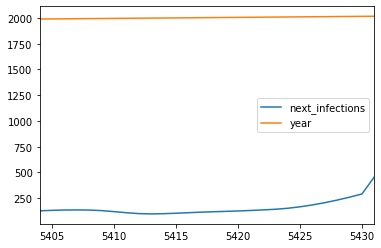

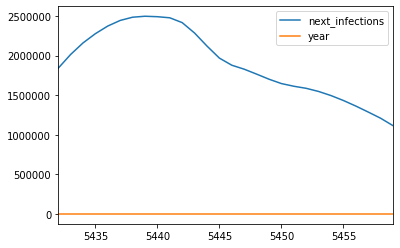

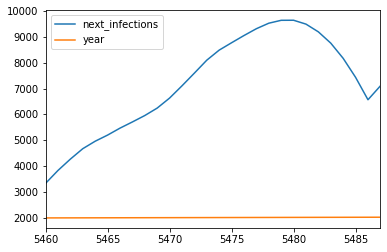

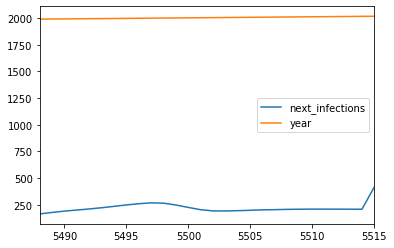

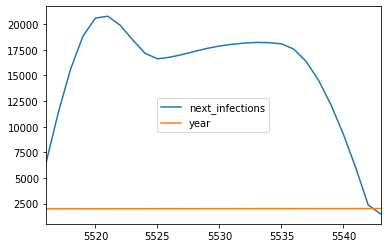

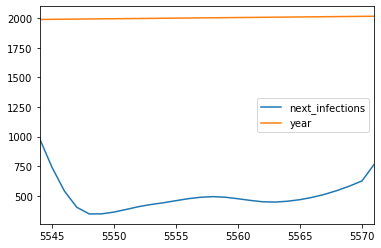

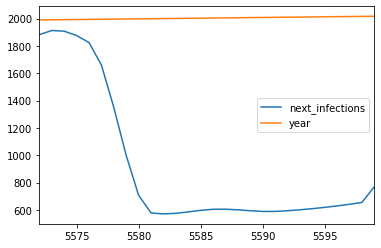

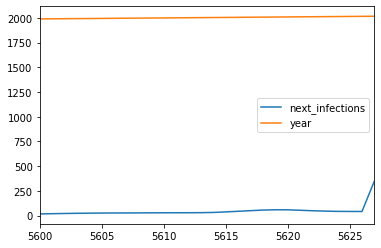

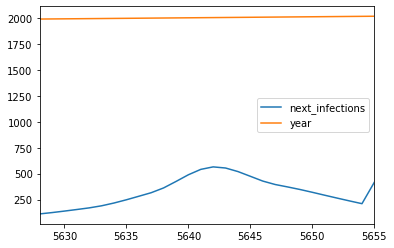

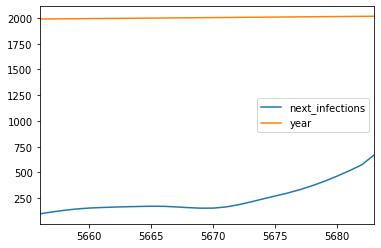

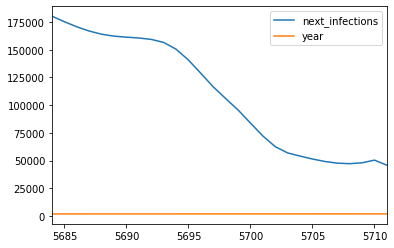

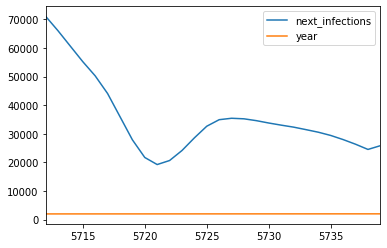

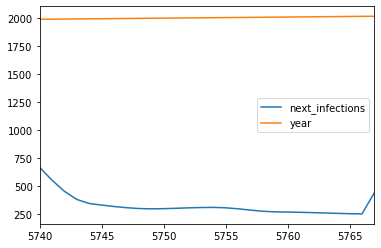

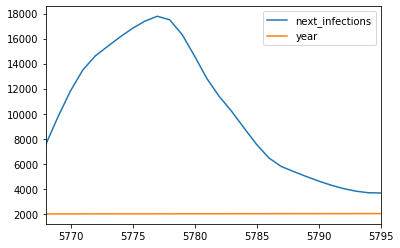

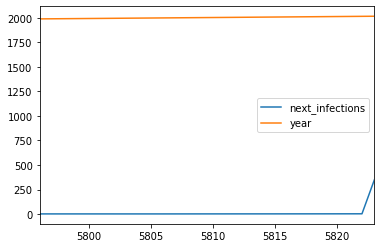

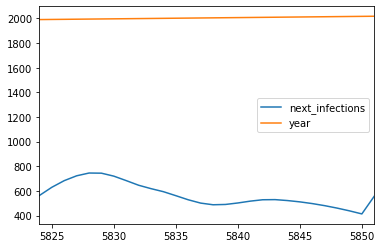

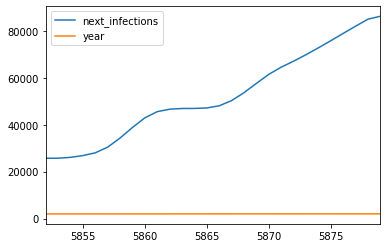

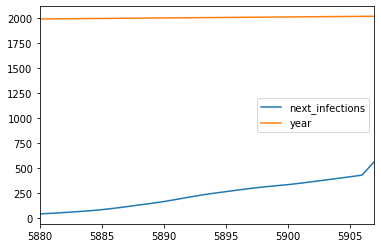

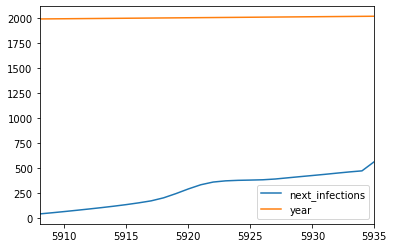

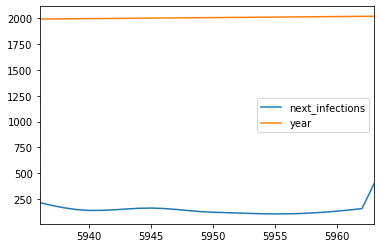

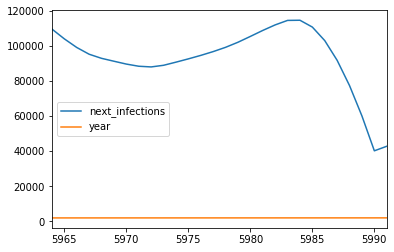

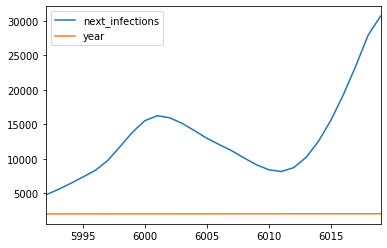

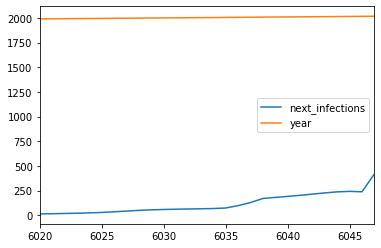

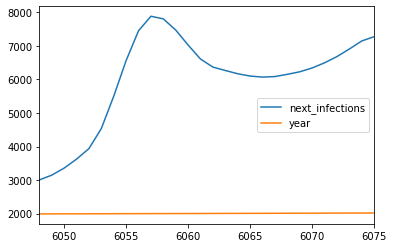

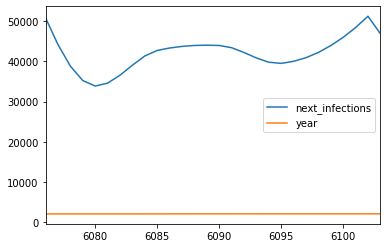

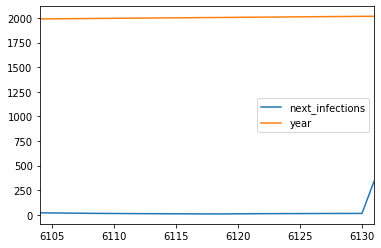

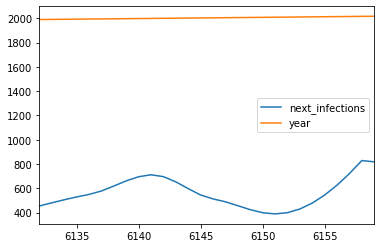

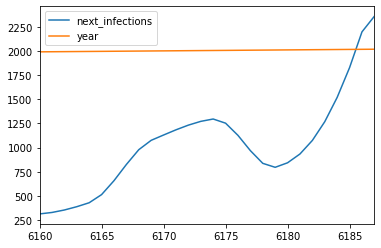

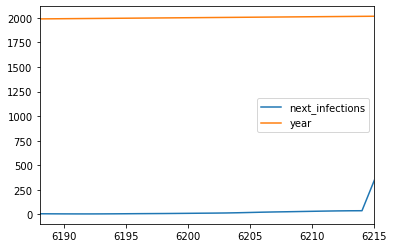

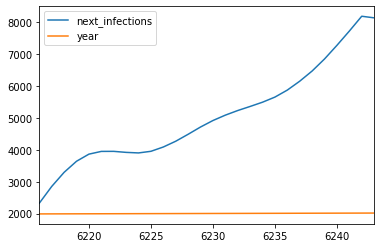

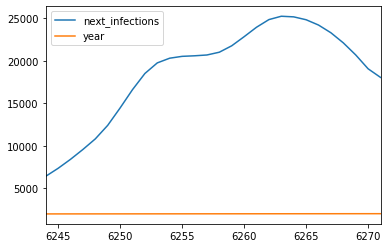

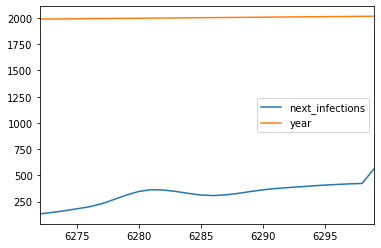

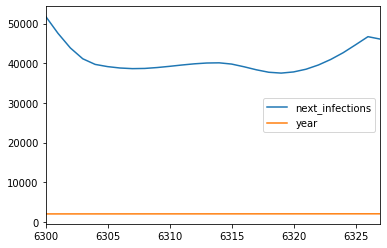

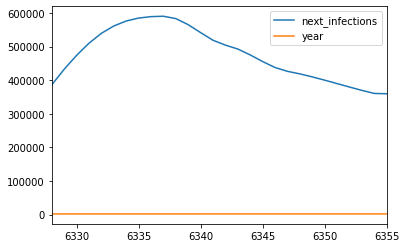

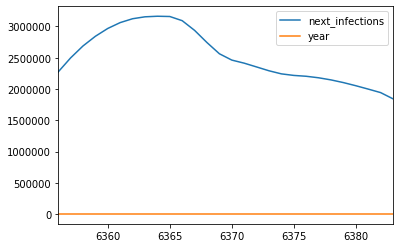

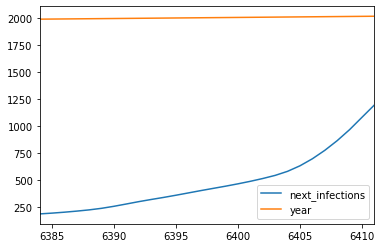

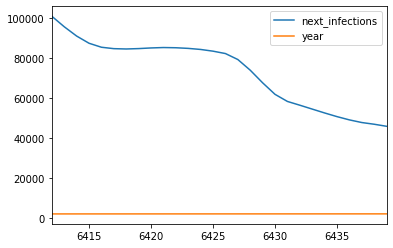

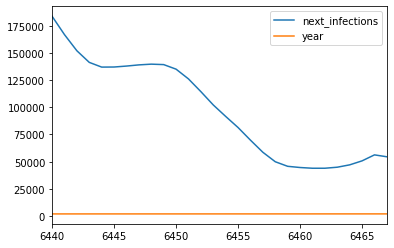

In [100]:
import seaborn as sns
final_data.groupby("country")["next_infections", "year"].plot()

In [108]:
cols = ["country", "next_infections", "year"]
final1 = final_data[cols]

In [109]:
final1.shape

(6468, 3)

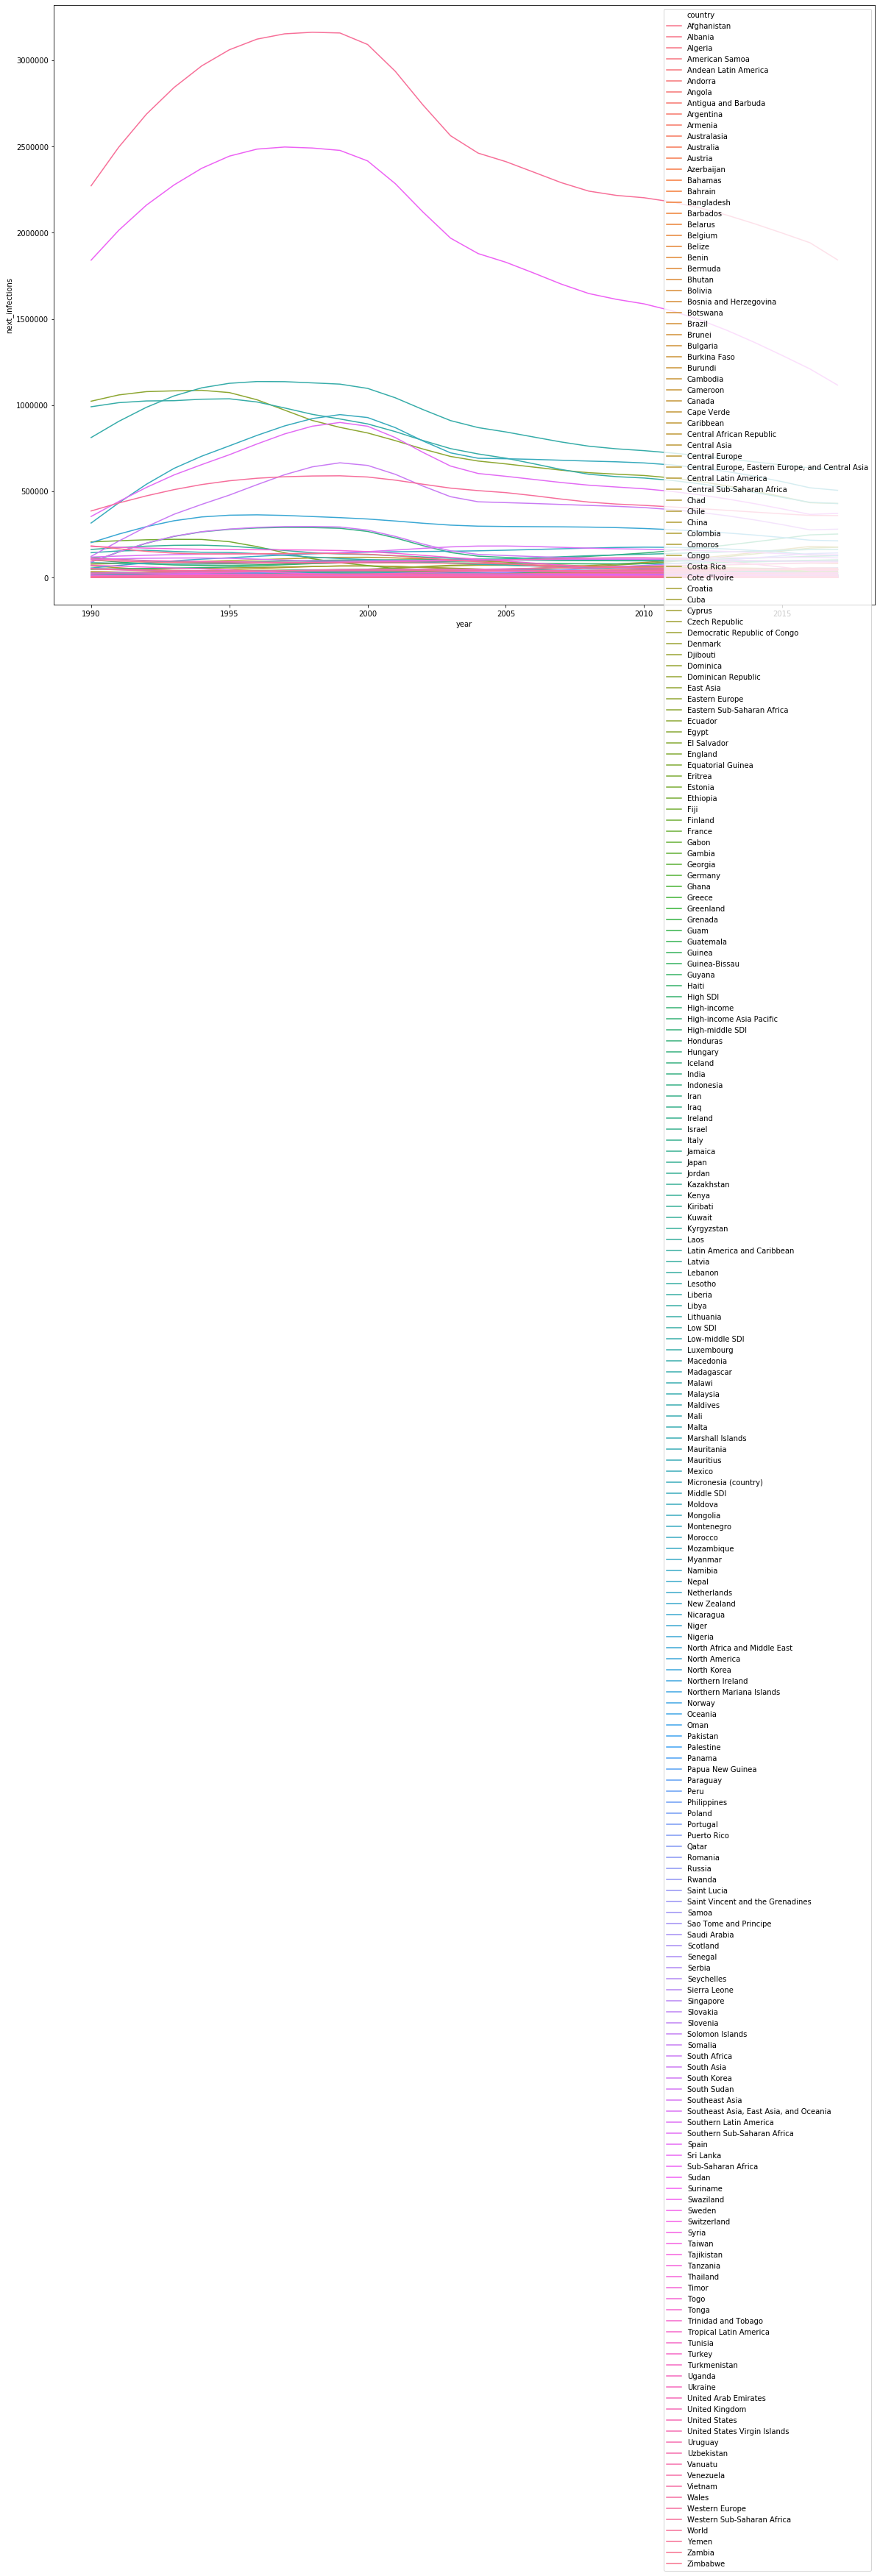

In [111]:
plt.figure(figsize=(20,15))
sns.lineplot(data=final1, y="next_infections",x="year", hue="country")

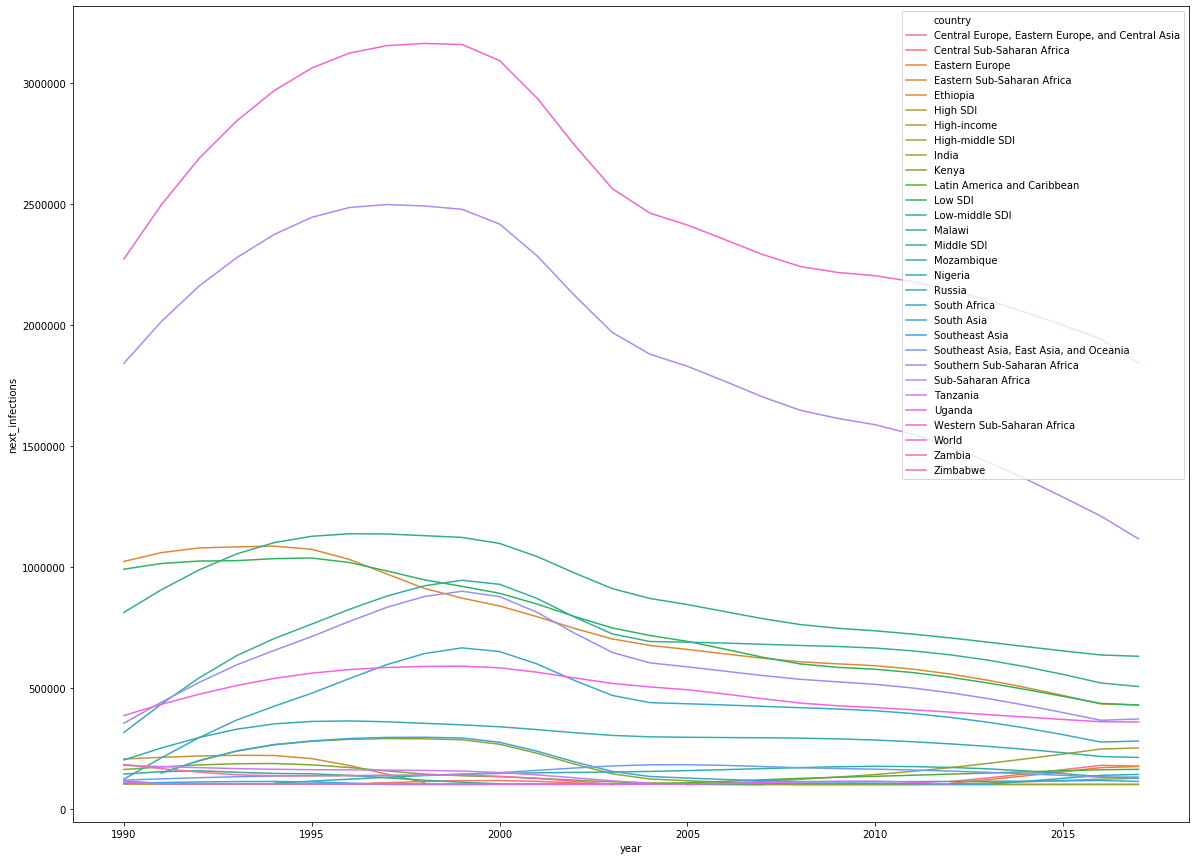

In [118]:
high_final = final1[final1["next_infections"] > 100000]
plt.figure(figsize=(20,15))
sns.lineplot(data=high_final, y="next_infections",x="year", hue="country")